In [1]:
cd /om2/user/leokoz8/code/rnns-of-rnns

/rdma/vast-rdma/vast/fiete/leokoz8/code/rnns-of-rnns


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.nn import functional as F

from src import models, utils

%load_ext autoreload
%autoreload 2

In [3]:
cd /om2/user/leokoz8/code/rnns-of-rnns/neurogym

/rdma/vast-rdma/vast/fiete/leokoz8/code/rnns-of-rnns/neurogym


In [178]:
param_dict = {"ns": None,
              "W_hh": None,
              "W_ih": None,
              "W_ho": None,
              "M_hat": None,
              "B_mask": None,              
             "input_size": ob_size,
                "hidden_size": 64,
             "output_size": act_size,
             "nonlinearity": 'tanh',
             "gamma": 1,
             "alpha": 1,
             "device": device}

 
#device = 'cpu'

#net = Net(num_h=64).to(device)
net = models.VSRNN(param_dict).to(device)   

inputs, labels = dataset()
inputs = torch.from_numpy(inputs).type(torch.float).permute(1,0,2).to(device)

labels = torch.from_numpy(labels.flatten()).type(torch.long).to(device)

outs = net(inputs)

tensor([[[-0.0683, -0.0351, -0.0976],
         [-0.0976, -0.0389, -0.0955],
         [-0.0981, -0.0321, -0.0602],
         ...,
         [-0.0297, -0.0376, -0.0496],
         [-0.0155, -0.0356, -0.0526],
         [-0.0277, -0.0334, -0.0514]],

        [[-0.0739, -0.0277, -0.0960],
         [-0.1062, -0.0417, -0.0953],
         [-0.0899, -0.0358, -0.0567],
         ...,
         [-0.0542, -0.0393, -0.0511],
         [-0.0590, -0.0432, -0.0472],
         [-0.0498, -0.0417, -0.0483]],

        [[-0.0723, -0.0304, -0.0999],
         [-0.0898, -0.0429, -0.0965],
         [-0.0839, -0.0346, -0.0577],
         ...,
         [-0.0367, -0.0381, -0.0480],
         [-0.0370, -0.0340, -0.0497],
         [-0.0362, -0.0386, -0.0472]],

        ...,

        [[-0.0581, -0.0297, -0.1012],
         [-0.0842, -0.0391, -0.0975],
         [-0.0811, -0.0284, -0.0587],
         ...,
         [-0.0288, -0.0363, -0.0455],
         [-0.0185, -0.0350, -0.0494],
         [-0.0178, -0.0336, -0.0522]],

        [[

In [210]:
from neurogym.wrappers import ScheduleEnvs
from neurogym.utils.scheduler import RandomSchedule
from neurogym.wrappers.block import MultiEnvs
from neurogym import Dataset
from Mod_Cog.mod_cog_tasks import *

envs = [go(), rtgo(), dlygo(), anti(), rtanti(), dlyanti(),
        dm1(), dm2(), ctxdm1(), ctxdm2(), multidm(), dlydm1(), dlydm2(),
        ctxdlydm1(), ctxdlydm2(), multidlydm(), dms(), dnms(), dmc(), dnmc(),
        dlygointr(),dlygointl(),dlyantiintr(),dlyantiintl(),dlydm1intr(),dlydm1intl(),
        dlydm2intr(),dlydm2intl(),ctxdlydm1intr(),ctxdlydm1intl(),ctxdlydm2intr(),ctxdlydm2intl(),
        multidlydmintr(),multidlydmintl(),dmsintr(),dmsintl(),dnmsintr(),
        dnmsintl(),dmcintr(),dmcintl(),dnmcintr(),dnmcintl(), goseqr(), rtgoseqr(), dlygoseqr(), 
        antiseqr(), rtantiseqr(), dlyantiseqr(), dm1seqr(), dm2seqr(), ctxdm1seqr(), ctxdm2seqr(), 
        multidmseqr(), dlydm1seqr(),dlydm2seqr(),ctxdlydm1seqr(), ctxdlydm2seqr(), multidlydmseqr(),
        dmsseqr(), dnmsseqr(), dmcseqr(), dnmcseqr(), goseql(), rtgoseql(), dlygoseql(), antiseql(),
        rtantiseql(), dlyantiseql(), dm1seql(), dm2seql(), ctxdm1seql(), ctxdm2seql(), multidmseql(), dlydm1seql(),
        dlydm2seql(),ctxdlydm1seql(), ctxdlydm2seql(), multidlydmseql(), dmsseql(), dnmsseql(), dmcseql(), dnmcseql()]

task = 'PerceptualDecisionMaking-v0'
kwargs = {'dt': 100}
seq_len = 100

# Make supervised dataset
dataset = ngym.Dataset(task, env_kwargs=kwargs, batch_size=16,
                       seq_len=seq_len)
env = dataset.env
ob_size = env.observation_space.shape[0]
act_size = env.action_space.n

In [228]:
import torch.nn.utils.parametrize as parametrize
from torch.nn.utils.parametrizations import spectral_norm
from torch.nn.utils import weight_norm
device = 'cuda' if torch.cuda.is_available() else 'cpu'


class Net(nn.Module):
    def __init__(self, num_h):
        super(Net, self).__init__()
        self.rnn = nn.RNN(ob_size, num_h)
        self.linear = nn.Linear(num_h, act_size)
        
        '''
        parametrize.register_parametrization(
            self.rnn,
            "weight_hh_l0",
            models.SymmetricStable(n=num_h, epsilon=1e-4, device=device),
        )
        '''
        snm = nn.utils.spectral_norm(self.rnn, "weight_hh_l0")

    def forward(self, x):
        out, hidden = self.rnn(x)
        x = self.linear(out)
        return x

param_dict = {"ns": None,
              "W_hh": None,
              "W_ih": None,
              "W_ho": None,
              "M_hat": None,
              "B_mask": None,              
             "input_size": ob_size,
                "hidden_size": 64,
             "output_size": act_size,
             "nonlinearity": 'tanh',
             "gamma": 1,
             "alpha": 1,
             "device": device} 


#net = Net(num_h=64).to(device)
#net = models.vRNNLayer(param_dict).to(device)   
net = models.RNNNet(input_size=ob_size, hidden_size=100, output_size=act_size,device = device, dt = 15).to(device)   
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-2)

running_loss = 0.0
for i in range(2000):
    inputs, labels = dataset()
    inputs = torch.from_numpy(inputs).type(torch.float).to(device)
    
    labels = torch.from_numpy(labels.flatten()).type(torch.long).to(device)

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs,rnn_outputs = net(inputs)

    loss = criterion(outputs.reshape(-1, act_size), labels)
    loss.backward()
    optimizer.step()

    # print statistics
    running_loss += loss.item()
    if i % 200 == 199:
        print('{:d} loss: {:0.5f}'.format(i + 1, running_loss / 200))
        running_loss = 0.0

print('Finished Training')

200 loss: 0.21121
400 loss: 0.13965
600 loss: 0.05502
800 loss: 0.03431
1000 loss: 0.02695
1200 loss: 0.02304
1400 loss: 0.02057
1600 loss: 0.01786
1800 loss: 0.01715
2000 loss: 0.01557
Finished Training


'cuda'

findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font f

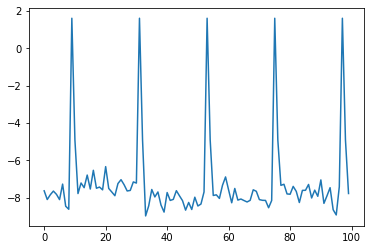

In [164]:
inputs, labels = dataset()
inputs = torch.from_numpy(inputs).type(torch.float).to(device)
labels = torch.from_numpy(labels.flatten()).type(torch.long).to(device)
outputs = net(inputs.permute(1,0,2))
with torch.no_grad():
    #print(inputs.permute(1,0,2).shape)
    plt.plot(outputs[0,:,1].cpu())
    #print(outputs[0,:,0])

In [236]:
with torch.no_grad():
    e,_ = torch.linalg.eigh(net.rnn.h2h.weight)
    print(e.max())

tensor(0.9988, device='cuda:0')


In [229]:
# TODO: Make this into a function in neurogym
perf = 0
num_trial = 200
for i in range(num_trial):
    env.new_trial()
    ob, gt = env.ob, env.gt
    ob = ob[:, np.newaxis, :]  # Add batch axis
    inputs = torch.from_numpy(ob).type(torch.float).to(device)

    action_pred,_ = net(inputs)
    action_pred = action_pred.cpu().detach().numpy()
    action_pred = np.argmax(action_pred, axis=-1)
    perf += gt[-1] == action_pred[-1, 0]

perf /= num_trial
print('Average performance in {:d} trials'.format(num_trial))
print(perf)

Average performance in 200 trials
0.925


In [163]:
with torch.no_grad():
    print(torch.linalg.norm(net.rnn.weight_hh_l0, ord = 2))

tensor(1.0000, device='cuda:0')


In [23]:
env

<ScheduleEnvs
	<ScheduleEnvs
		<_MultiModalityStimulus<_Reach>>
		<_MultiModalityStimulus<_Reach>>
	>
	<ScheduleEnvs
		<_MultiModalityStimulus<_Reach>>
		<_MultiModalityStimulus<_Reach>>
	>
	<ScheduleEnvs
		<_MultiModalityStimulus<_Reach>>
		<_MultiModalityStimulus<_Reach>>
	>
	<ScheduleEnvs
		<_MultiModalityStimulus<_Reach>>
		<_MultiModalityStimulus<_Reach>>
	>
	<ScheduleEnvs
		<_MultiModalityStimulus<_Reach>>
		<_MultiModalityStimulus<_Reach>>
	>
	<ScheduleEnvs
		<_MultiModalityStimulus<_Reach>>
		<_MultiModalityStimulus<_Reach>>
	>
	<_DMFamily>
	<_DMFamily>
	<_DMFamily>
	<_DMFamily>
	<_DMFamily>
	<_DMFamily>
	<_DMFamily>
	<_DMFamily>
	<_DMFamily>
	<_DMFamily>
	<ScheduleEnvs
		<_MultiModalityStimulus<_DelayMatch1DResponse>>
		<_MultiModalityStimulus<_DelayMatch1DResponse>>
	>
	<ScheduleEnvs
		<_MultiModalityStimulus<_DelayMatch1DResponse>>
		<_MultiModalityStimulus<_DelayMatch1DResponse>>
	>
	<ScheduleEnvs
		<_MultiModalityStimulus<_DelayMatch1DResponse>>
		<_MultiModalityStimulus<_

Download MNIST dataset

torch.Size([60000, 28, 28])
torch.Size([60000])


/om/user/leokoz8/envs/rnns-of-rnns-env/lib/python3.8/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/om/user/leokoz8/envs/rnns-of-rnns-env/lib/python3.8/site-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


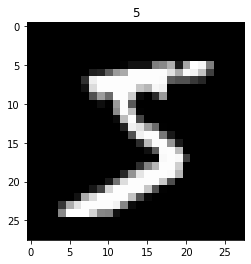

/om/user/leokoz8/envs/rnns-of-rnns-env/lib/python3.8/site-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/om/user/leokoz8/envs/rnns-of-rnns-env/lib/python3.8/site-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [30]:
import torchvision.datasets as dsets
import torchvision.transforms as transforms

          # learning rate
DOWNLOAD_MNIST = False   # set to True if haven't download the data
BATCH_SIZE = 64

# Mnist digital dataset
train_data = dsets.MNIST(
    root='./mnist/',
    train=True,                         # this is training data
    transform=transforms.ToTensor(),    # Converts a PIL.Image or numpy.ndarray to
                                        # torch.FloatTensor of shape (C x H x W) and normalize in the range [0.0, 1.0]
    download=DOWNLOAD_MNIST,            # download it if you don't have it
)

# plot one example
print(train_data.train_data.size())     # (60000, 28, 28)
print(train_data.train_labels.size())   # (60000)
plt.imshow(train_data.train_data[0].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[0])
plt.show()

# Data Loader for easy mini-batch return in training
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

# convert test data into Variable, pick 2000 samples to speed up testing
test_data = dsets.MNIST(root='./mnist/', train=False, transform=transforms.ToTensor())
test_x = test_data.test_data.type(torch.FloatTensor)[:2000]/255.   # shape (2000, 28, 28) value in range(0,1)
test_y = test_data.test_labels.numpy()[:2000]    # covert to numpy array

In [33]:
ns = [32,32,8,32,32]

A_tril = torch.zeros((len(ns), len(ns)))
A_tril[-1, :] = 1
B_mask = F.dropout(utils.create_mask_given_A(A_tril, ns), 0.8) 
W_hh,Ws = utils.create_random_block_stable_symmetric_weights(ns)
M_hat = utils.get_M_given_sym_W(W_hh)

param_dict = {"ns": ns,
              "W_hh": W_hh,
              "W_ih": None,
              "W_ho": None,
              "M_hat": M_hat,
              "B_mask": B_mask,              
             "input_size": int(28),
             "output_size": 10,
             "nonlinearity": 'tanh',
             "gamma": 1,
             "alpha": 0.01}



rnn = models.GWRNN(param_dict)


In [34]:


EPOCH = 5  
LR = 0.01   
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()                       # the target label is not one-hotted

# training and testing
for epoch in range(EPOCH):
    
    for step, (b_x, b_y) in enumerate(train_loader):        # gives batch data
        b_x = b_x.view(-1, 28, 28)              # reshape x to (batch, time_step, input_size)

        output = rnn(b_x)                               # rnn output
        loss = loss_func(output[:,-1,:], b_y)                   # cross entropy loss
        optimizer.zero_grad()                           # clear gradients for this training step
        loss.backward()                                 # backpropagation, compute gradients
        optimizer.step()                                # apply gradients

        if step % 50 == 0:
            test_output = rnn(test_x)                   # (samples, time_step, input_size)
            pred_y = torch.max(test_output[:,-1,:], 1)[1].data.numpy()
            accuracy = float((pred_y == test_y).astype(int).sum()) / float(test_y.size)
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy(), '| test accuracy: %.2f' % accuracy)

          
# print 10 predictions from test data
test_output = rnn(test_x[:10].view(-1, 28, 28))
pred_y = torch.max(test_output[:,-1,:], 1)[1].data.numpy()
print(pred_y, 'prediction number')
print(test_y[:10], 'real number')


Epoch:  0 | train loss: 2.2989 | test accuracy: 0.12
Epoch:  0 | train loss: 1.7306 | test accuracy: 0.37
Epoch:  0 | train loss: 1.4069 | test accuracy: 0.52
Epoch:  0 | train loss: 1.2554 | test accuracy: 0.61
Epoch:  0 | train loss: 0.9199 | test accuracy: 0.68
Epoch:  0 | train loss: 0.6416 | test accuracy: 0.72
Epoch:  0 | train loss: 0.8422 | test accuracy: 0.77
Epoch:  0 | train loss: 0.6807 | test accuracy: 0.79
Epoch:  0 | train loss: 0.5595 | test accuracy: 0.81
Epoch:  0 | train loss: 0.4921 | test accuracy: 0.83
Epoch:  0 | train loss: 0.5150 | test accuracy: 0.84
Epoch:  0 | train loss: 0.6388 | test accuracy: 0.84
Epoch:  0 | train loss: 0.3493 | test accuracy: 0.84
Epoch:  0 | train loss: 0.4153 | test accuracy: 0.86
Epoch:  0 | train loss: 0.2959 | test accuracy: 0.85
Epoch:  0 | train loss: 0.2933 | test accuracy: 0.87
Epoch:  0 | train loss: 0.2652 | test accuracy: 0.87
Epoch:  0 | train loss: 0.4924 | test accuracy: 0.87
Epoch:  0 | train loss: 0.1552 | test accuracy

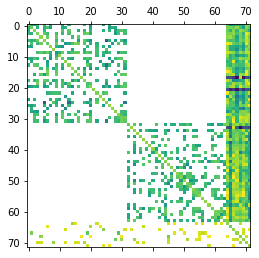

In [134]:
with torch.no_grad():
    plt.matshow(torch.log(torch.abs(rnn.rnn.weight_hh) + torch.abs(rnn.L_hat.weight))+0.01)